In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
mjr_violations_orig = pd.read_csv('data/mjrhouse_violations.csv')

In [3]:
violations = mjr_violations_orig
violations.shape

(27863, 34)

In [4]:
violations.head()

,Number,Violation,Case_Type,Inspector,Status,Primary_Party,Violation_Date,Resolve,Compliance,Compliance_Requested,...,Prop_Use_Code,Prop_Use_Desc,TRS_WATSON,SECTION_1,TOWNSHIP_1,RANGE_1,TD,RD,COUNTY,DESCRIPT
0,CE-15-02088,Overgrown Yard / Weeds,MJRHOUSE - Major Housing Violation,"Walter L. Booth, Sr.",Opened,ALAN SCHNEIDER,2015-09-11,NaN,2015-12-18,2015-10-11,...,200.0,MOBILE HOME,09S19E002,002,09,19,S,E,ALACHUA,09S19E02
1,CE-10-03462,Blight-inducing Materials,MJRHOUSE - Major Housing Violation,"Walter L. Booth, Sr.",Opened,"SANDERS, JUNE E",2010-09-27,NaN,2011-01-04,2010-10-08,...,200.0,MOBILE HOME,09S19E002,002,09,19,S,E,ALACHUA,09S19E02
2,CE-09-06929,Dead Tree or Hazardous Trees,MJRHOUSE - Major Housing Violation,"Walter L. Booth, Sr.",Opened,ADD PARTY,2009-10-27,NaN,2010-03-22,2010-03-08,...,200.0,MOBILE HOME,09S19E002,002,09,19,S,E,ALACHUA,09S19E02
3,CE-09-06929,Overgrown Yard / Weeds,MJRHOUSE - Major Housing Violation,"Walter L. Booth, Sr.",Opened,ADD PARTY,2009-10-27,NaN,2010-03-22,2010-03-08,...,200.0,MOBILE HOME,09S19E002,002,09,19,S,E,ALACHUA,09S19E02
4,CE-15-02201,Overgrown Yard / Weeds,MJRHOUSE - Major Housing Violation,"Walter L. Booth, Sr.",Opened,"TURKEY CREEK FOREST OWNERS, ASSOCIATION",2015-09-18,NaN,2015-10-08,2015-10-04,...,200.0,MOBILE HOME,09S19E002,002,09,19,S,E,ALACHUA,09S19E02


In [5]:
violations.drop(['Resolve','Compliance_Requested','Case_Type','CEB_Compliance_Requested','Tag_', 'VIN_',
       'Make', 'Color','Vehicle_Description', 'Address', 'Quantity','PARCEL_1', 'MAPSHEET','COUNTY', 'DESCRIPT'], axis=1, inplace = True)
violations.columns

Index(['Number', 'Violation', 'Inspector', 'Status', 'Primary_Party',
       'Violation_Date', 'Compliance', 'Received_By', 'PARCEL_CLEAN',
       'LATITUDE', 'LONGITUDE', 'Prop_Use_Code', 'Prop_Use_Desc', 'TRS_WATSON',
       'SECTION_1', 'TOWNSHIP_1', 'RANGE_1', 'TD', 'RD'],
      dtype='object')

In [6]:
#change to datetime format
violations["Violation_Date"] = pd.to_datetime(violations["Violation_Date"])
violations["Violation_Date"] = pd.to_datetime(violations['Compliance'])

# Blight Violations

In [7]:
blight_violations = violations[violations['Violation'].isin(['Blight-inducing Materials','Abandoned Vehicles And/or Blight Inducing Materials'])].reset_index(drop=True)
blight_violations.head()

,Number,Violation,Inspector,Status,Primary_Party,Violation_Date,Compliance,Received_By,PARCEL_CLEAN,LATITUDE,LONGITUDE,Prop_Use_Code,Prop_Use_Desc,TRS_WATSON,SECTION_1,TOWNSHIP_1,RANGE_1,TD,RD
0,CE-10-03462,Blight-inducing Materials,"Walter L. Booth, Sr.",Opened,"SANDERS, JUNE E",2011-01-04,2011-01-04,By Phone,05977-217-000,29.735988,-82.384887,200.0,MOBILE HOME,09S19E002,002,09,19,S,E
1,CE-18-01217,Abandoned Vehicles And/or Blight Inducing Mate...,Todd Martin,Opened,"COOK, CHRISTOPHER H",2018-08-02,2018-08-02,311GNV,05977-276-000,29.732794,-82.386024,200.0,MOBILE HOME,09S19E002,002,09,19,S,E
2,CE-10-03463,Blight-inducing Materials,"Walter L. Booth, Sr.",Opened,"ALLEN, ELIZABETH SUE",2012-05-16,2012-05-16,By Phone,05979-056-000,29.733962,-82.382726,100.0,SINGLE FAMILY,09S19E002,002,09,19,S,E
3,CE-10-01790,Blight-inducing Materials,"Walter L. Booth, Sr.",Opened,"ARC COMMUNITIES 6 LLC , ...",2010-05-17,2010-05-17,By Phone,05983-000-000,29.735166,-82.374964,2800.0,PKG LOT (COMM),09S19E002,002,09,19,S,E
4,CE-10-00340,Blight-inducing Materials,"Walter L. Booth, Sr.",Opened,HARRIS MARCELOUS M,2010-03-23,2010-03-23,CE Officer,06006-040-030,29.726796,-82.399143,100.0,SINGLE FAMILY,09S19E010,010,09,19,S,E


In [8]:
# violations['blight'] = violations['Violation'].isin(['Blight-inducing Materials','Abandoned Vehicles And/or Blight Inducing Materials']).astype(int)

# violations.head()

## Number of each Blight Violation

In [9]:
blight_violations['Violation'].value_counts()

Abandoned Vehicles And/or Blight Inducing Materials    3597
Blight-inducing Materials                              2663
Name: Violation, dtype: int64

In [10]:
total_blight = blight_violations['Number'].count()
print(total_blight)

6260


### Percent of Total Violations

In [11]:
total_violations = violations.shape[0]
blight_violations['Number'].count() / total_violations

0.2246707102609195

## Blight Complaint Sources

#### Number from each Complaint Source

In [12]:
#whats the difference between proactive and CE officer?
blight_complaint_source = blight_violations.groupby('Received_By').count()["Number"]
print(blight_complaint_source)

Received_By
311GNV         104
Admin           13
By Email       103
By Mail         15
By Phone       543
CE Officer    4596
MANAGER          8
Proactive      774
SUPERVISOR      24
Voice Mail      15
Walk In         45
Name: Number, dtype: int64


#### Percent of Total blight violations

In [13]:
blight_complaint_source / total_blight *100

Received_By
311GNV         1.661342
Admin          0.207668
By Email       1.645367
By Mail        0.239617
By Phone       8.674121
CE Officer    73.418530
MANAGER        0.127796
Proactive     12.364217
SUPERVISOR     0.383387
Voice Mail     0.239617
Walk In        0.718850
Name: Number, dtype: float64

## Complaint Sources from All Majorhousing Violations

In [14]:
complaint_source = violations.groupby('Received_By').count()["Number"]
print(complaint_source)

Received_By
311GNV          492
Admin            68
By Email        680
By Fax            1
By Mail          60
By Phone       6317
CE Officer    16226
MANAGER          54
Proactive      3135
SUPERVISOR      122
Voice Mail      157
Walk In         371
Name: Number, dtype: int64


In [15]:
complaint_source / total_violations *100

Received_By
311GNV         1.765783
Admin          0.244051
By Email       2.440513
By Fax         0.003589
By Mail        0.215339
By Phone      22.671643
CE Officer    58.234935
MANAGER        0.193805
Proactive     11.251480
SUPERVISOR     0.437857
Voice Mail     0.563471
Walk In        1.331515
Name: Number, dtype: float64

#### 12.3% of blight violations are proactively found, marginally higher then the 11.2% out of all violations.
#### 73.4% of blight violations are found by CE Officers, which is significantly higher then the 58.2% out of all Violations

# Blight Violation by Month

In [16]:
blight_violations["month"] = blight_violations['Violation_Date'].map(lambda x: x.month)
blight_violations["year"] = blight_violations['Violation_Date'].map(lambda x: x.year)


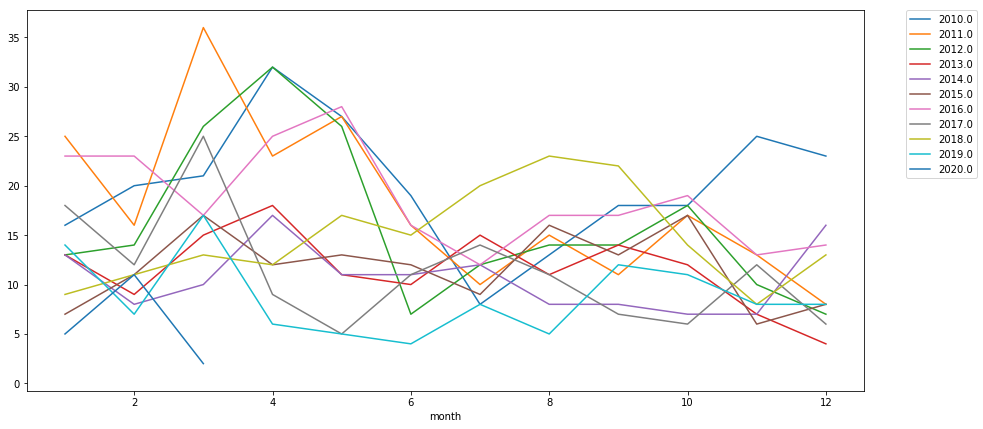

In [17]:
blight_violations_new = blight_violations[blight_violations['year'] > 2009]

fig, ax = plt.subplots(figsize=(15,7))

blight_violations_new.groupby(['month','year']).count()['Number'].unstack().plot(ax=ax)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


# Violations by Year

In [27]:
blight_by_year = blight_violations.groupby(blight_violations['Violation_Date'].map(lambda x: x.year)).count()['Number'].to_frame()
vio_by_year = violations.groupby(violations['Violation_Date'].map(lambda x: x.year)).count()['Number'].to_frame()
# blight_by_year
percent_blight_per_year = blight_by_year['Number'] / vio_by_year['Number']
# percent_blight_per_year = percent_blight_per_year.reset_index()
# percent_blight_per_year
# vio_by_year

In [28]:
sns.lineplot(x=percent_blight_per_year["Violation_Date"], y=percent_blight_per_year["Number"], data = percent_blight_per_year)

AttributeError: module 'seaborn' has no attribute 'lineplot'

In [29]:
violations_top_10 = violations['Violation'].value_counts()[:10].reset_index()

top_10 = [violation for violation in violations_top_10["index"]]
    
only_top_violations = violations[violations["Violation"].isin(top_10)]
only_top_violations.head()




,Number,Violation,Inspector,Status,Primary_Party,Violation_Date,Compliance,Received_By,PARCEL_CLEAN,LATITUDE,LONGITUDE,Prop_Use_Code,Prop_Use_Desc,TRS_WATSON,SECTION_1,TOWNSHIP_1,RANGE_1,TD,RD
0,CE-15-02088,Overgrown Yard / Weeds,"Walter L. Booth, Sr.",Opened,ALAN SCHNEIDER,2015-12-18,2015-12-18,311GNV,05977-215-000,29.735921,-82.384432,200.0,MOBILE HOME,09S19E002,002,09,19,S,E
1,CE-10-03462,Blight-inducing Materials,"Walter L. Booth, Sr.",Opened,"SANDERS, JUNE E",2011-01-04,2011-01-04,By Phone,05977-217-000,29.735988,-82.384887,200.0,MOBILE HOME,09S19E002,002,09,19,S,E
2,CE-09-06929,Dead Tree or Hazardous Trees,"Walter L. Booth, Sr.",Opened,ADD PARTY,2010-03-22,2010-03-22,CE Officer,05977-217-000,29.735988,-82.384887,200.0,MOBILE HOME,09S19E002,002,09,19,S,E
3,CE-09-06929,Overgrown Yard / Weeds,"Walter L. Booth, Sr.",Opened,ADD PARTY,2010-03-22,2010-03-22,CE Officer,05977-217-000,29.735988,-82.384887,200.0,MOBILE HOME,09S19E002,002,09,19,S,E
4,CE-15-02201,Overgrown Yard / Weeds,"Walter L. Booth, Sr.",Opened,"TURKEY CREEK FOREST OWNERS, ASSOCIATION",2015-10-08,2015-10-08,311GNV,05977-217-000,29.735988,-82.384887,200.0,MOBILE HOME,09S19E002,002,09,19,S,E


In [30]:
top_violation_types_by_year = only_top_violations.groupby([violations['Violation_Date'].map(lambda x: x.year),"Violation"])["Number"].count().reset_index()
#violation_types_by_year = violations.groupby(["Violation_Date","Violation"]).count.reset_index(name = "Violation_Year")
top_violation_types_by_year.head()


,Violation_Date,Violation,Number
0,1999.0,Abandoned Vehicles And/or Blight Inducing Mate...,76
1,1999.0,Blight-inducing Materials,1
2,1999.0,Conversion Only (violation),61
3,1999.0,Hazardous Condition - Residential,2
4,1999.0,"Insects, Rodents and Vermin; Natural Drainage",2


In [31]:
sns.lineplot(x=top_violation_types_by_year["Violation_Date"], y=top_violation_types_by_year["Number"],\
             hue=top_violation_types_by_year["Violation"], data = top_violation_types_by_year, legend='brief')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

AttributeError: module 'seaborn' has no attribute 'lineplot'

### Total Housing Violations by Year

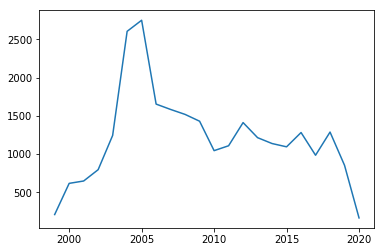

In [32]:
plt.plot(vio_by_year)

### Blight Violations by Year

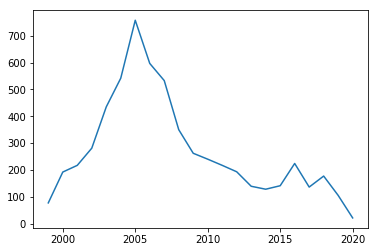

In [33]:
plt.plot(blight_by_year)

### Percent of blight violations per year

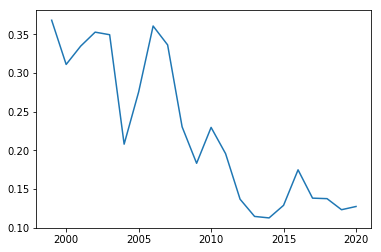

In [34]:
plt.plot(percent_blight_per_year)

In [81]:
### blight violations

# Violations by Property Type

In [20]:
blight_prop_type = blight_violations.groupby('Prop_Use_Desc').count().sort_values('Number',ascending=False)['Number']
(blight_prop_type / total_blight * 100)

Prop_Use_Desc
SINGLE FAMILY                84.936102
MFR <10 UNITS                 6.373802
VACANT                        3.274760
MISC. RESIDENCE               0.974441
MULTIFAMILY                   0.766773
VACANT COMM                   0.638978
MOBILE HOME                   0.415335
CONDOMINIUM                   0.319489
CHURCHES                      0.207668
STORES                        0.175719
PKG LOT (COMM)                0.175719
STORE/OFF/RES                 0.143770
MUNICIPAL                     0.127796
OFFICE 1 STORY                0.111821
CLB/LDG/UN HALL               0.095847
COMMON AREA                   0.079872
MUNICIPAL VACANT/XFEATURE     0.079872
SERVICE SHOPS                 0.063898
PROF OFFICES                  0.047923
PRV SCHL/COLL                 0.047923
MOTEL                         0.047923
STATE(TIITF) VACANT/XF        0.031949
WAREH/DIST TERM               0.031949
SH CTR NBHD                   0.015974
REST DRIVE-IN                 0.015974
ORPHNG/NON-

In [21]:
# Number of NA's in blight property types
total_blight - blight_prop_type.sum()

45

### A significant majority (84.9%) of blight violations are from single family homes, followed by Mult Units of < 10 (6.37%) and Vacant homes (3.27%)


# Blight by Primary Party

In [37]:
primary_party = blight_violations.groupby("Primary_Party").count().sort_values('Number',ascending=False)['Number']
primary_party = primary_party.to_frame()
primary_party_frame = primary_party[3:14]
# primary_party.index

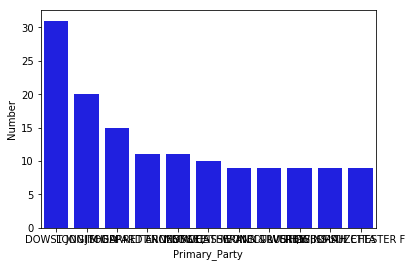

In [38]:
sns.barplot(x=primary_party_frame.index, y="Number", data=primary_party_frame,
            label="Total", color="b")

In [55]:
primary_party = primary_party[3:]

primary_party.shape



(4310, 1)

In [56]:
primary_party[primary_party["Number"] > 1].count()

Number    1037
dtype: int64

In [58]:
print("Number of repeat offenders: ")
1037/4310

Number of repeat offenders: 


0.2406032482598608

In [184]:
parcels = blight_violations.groupby("PARCEL_CLEAN").count().sort_values('Number',ascending=False)['Number']
parcels.head()
# blight_violations

PARCEL_CLEAN
07918-025-031    14
06104-010-008    12
06066-028-000    11
12515-000-000    10
06398-021-000    10
Name: Number, dtype: int64

# Top 10 Violations Over Time

In [172]:
violation_desc_10 = violation_desc[violation_desc["Number"] != 1][:10].to_dict()

vio_10 = [] 
for x in violation_desc_10['Number'].keys():  
    vio_10.append(x)

vio_10

['Overgrown Yard / Weeds',
 'Abandoned Vehicles And/or Blight Inducing Materials',
 'Blight-inducing Materials',
 'Hazardous Condition - Residential',
 'Dead Tree or Hazardous Trees',
 'Interior Holes Sealed',
 'Smoke Detectors',
 'Conversion Only (violation)',
 'Trash & Garbage',
 'Insects, Rodents and Vermin; Natural Drainage']

In [181]:
violations["month"] = violations['Violation_Date'].map(lambda x: x.month)
violations["year"] = violations['Violation_Date'].map(lambda x: x.year)


new_violations = violations[violations['Violation'].isin(vio_10) == True]
new_violations.head()


,Number,Violation,Inspector,Status,Primary_Party,Violation_Date,Compliance,Received_By,PARCEL_CLEAN,LATITUDE,...,Prop_Use_Code,Prop_Use_Desc,TRS_WATSON,SECTION_1,TOWNSHIP_1,RANGE_1,TD,RD,month,year
0,CE-15-02088,Overgrown Yard / Weeds,"Walter L. Booth, Sr.",Opened,ALAN SCHNEIDER,2015-12-18,2015-12-18,311GNV,05977-215-000,29.735921,...,200.0,MOBILE HOME,09S19E002,002,09,19,S,E,12.0,2015.0
1,CE-10-03462,Blight-inducing Materials,"Walter L. Booth, Sr.",Opened,"SANDERS, JUNE E",2011-01-04,2011-01-04,By Phone,05977-217-000,29.735988,...,200.0,MOBILE HOME,09S19E002,002,09,19,S,E,1.0,2011.0
2,CE-09-06929,Dead Tree or Hazardous Trees,"Walter L. Booth, Sr.",Opened,ADD PARTY,2010-03-22,2010-03-22,CE Officer,05977-217-000,29.735988,...,200.0,MOBILE HOME,09S19E002,002,09,19,S,E,3.0,2010.0
3,CE-09-06929,Overgrown Yard / Weeds,"Walter L. Booth, Sr.",Opened,ADD PARTY,2010-03-22,2010-03-22,CE Officer,05977-217-000,29.735988,...,200.0,MOBILE HOME,09S19E002,002,09,19,S,E,3.0,2010.0
4,CE-15-02201,Overgrown Yard / Weeds,"Walter L. Booth, Sr.",Opened,"TURKEY CREEK FOREST OWNERS, ASSOCIATION",2015-10-08,2015-10-08,311GNV,05977-217-000,29.735988,...,200.0,MOBILE HOME,09S19E002,002,09,19,S,E,10.0,2015.0


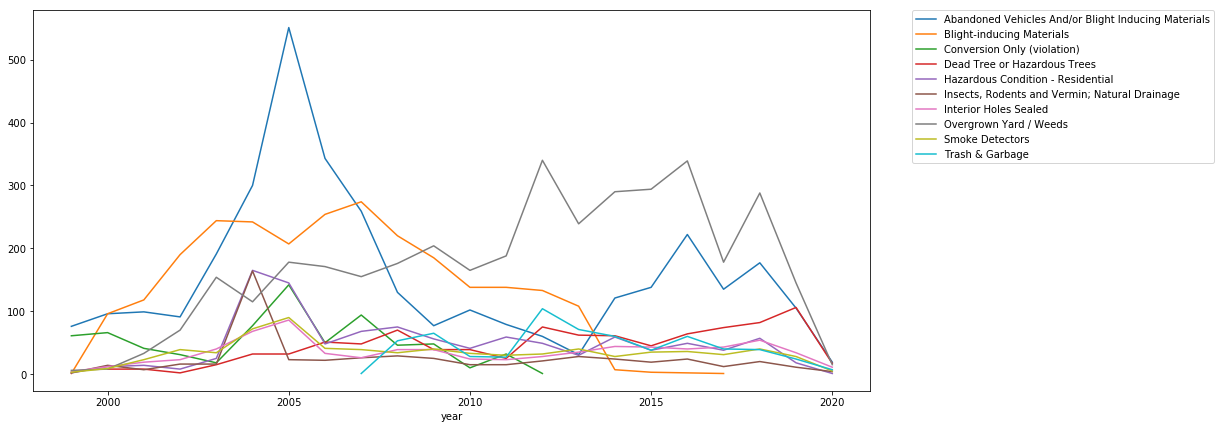

In [183]:
fig, ax = plt.subplots(figsize=(15,7))

new_violations.groupby(['year','Violation']).count()['Number'].unstack().plot(ax=ax)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)